In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

### 2

In [3]:
# just some scratch work to calculate relative flux between planet and star
k = 1.3807e-16 
h = 6.6261e-27
c = 2.998e10
lambda_max_p = 1.062e-3 # use for both star and planet

def calc_rel_flux(r_star, r_p, ts, tp):
    planet_exponent = h * c/(tp * lambda_max_p * k)
    star_exponent = h * c/(ts * lambda_max_p * k)
    return ((r_p/r_star)**2) * (math.e**(star_exponent) - 1) / (math.e**(planet_exponent) - 1)

In [4]:
calc_rel_flux(6.957e10, 6.371e8, 5500, 273)

1.6500958012999558e-07

### 3

In [5]:
def planck_wavelength(lam, T):
    numerator = (2*h*c**2)/(lam**5)
    denominator = math.e**(h*c/(lam*k*T)) - 1
    return numerator/denominator

In [16]:
lams = np.linspace(912*1e-8, 1e-1, 1000) # guessing it's 912 Angstroms
lams = np.logspace(np.log10(912*1e-8), np.log10(1e-1), 1000)
print(lams[0], lams[-1])

9.120000000000006e-06 0.1


/Users/chris/anaconda2/envs/superflare/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


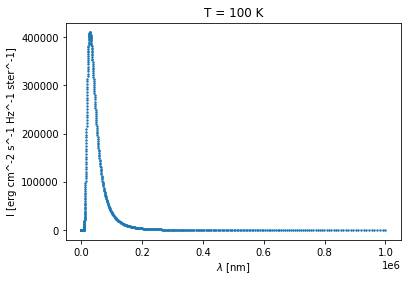

In [24]:
plt.scatter(1e7*lams, planck_wavelength(lams, 100), s=2)
plt.title('T = 100 K')
plt.xlabel('$\lambda$ [nm]')
plt.ylabel('I [erg cm^-2 s^-1 Hz^-1 ster^-1]')
#plt.xscale('log')
plt.show()

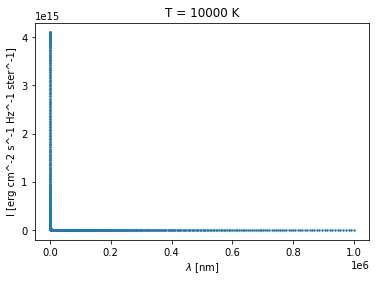

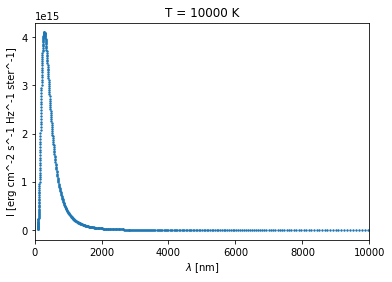

In [28]:
plt.scatter(1e7*lams, planck_wavelength(lams, 10000), s=2)
plt.title('T = 10000 K')
plt.xlabel('$\lambda$ [nm]')
plt.ylabel('I [erg cm^-2 s^-1 Hz^-1 ster^-1]')
#plt.xscale('symlog', linthreshx=0.1)
#plt.xlim(0, 1e-3)
#plt.yscale('log')
plt.show()

# Ok, we need to zoom in to show that it follows the classic blackbody shape
plt.scatter(1e7*lams, planck_wavelength(lams, 10000), s=2)
plt.title('T = 10000 K')
plt.xlabel('$\lambda$ [nm]')
plt.ylabel('I [erg cm^-2 s^-1 Hz^-1 ster^-1]')
#plt.xscale('symlog', linthreshx=0.1)
plt.xlim(0, 1e7*1e-3)
#plt.yscale('log')
plt.show()

And now we show that the intensity for 10000 K is greater than that for 100 K at all wavelengths.

/Users/chris/anaconda2/envs/superflare/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


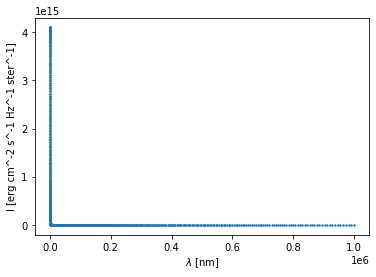

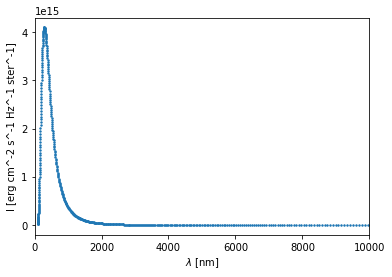

In [32]:
plt.scatter(1e7*lams, planck_wavelength(lams, 10000)-planck_wavelength(lams, 100), s=2)
plt.xlabel('$\lambda$ [nm]')
plt.ylabel('I [erg cm^-2 s^-1 Hz^-1 ster^-1]')
#plt.xscale('symlog', linthreshx=0.1)
#plt.xlim(0, 1e-3)
#plt.yscale('log')
plt.show()

plt.scatter(1e7*lams, planck_wavelength(lams, 10000)-planck_wavelength(lams, 100), s=2)
plt.xlabel('$\lambda$ [nm]')
plt.ylabel('I [erg cm^-2 s^-1 Hz^-1 ster^-1]')
#plt.xscale('symlog', linthreshx=0.1)
plt.xlim(0, 1e7*1e-3)
#plt.yscale('log')
plt.show()

In [33]:
print(np.where(planck_wavelength(lams, 10000)-planck_wavelength(lams, 100) <= 0))

(array([], dtype=int64),)


/Users/chris/anaconda2/envs/superflare/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


^^At no point does intensity of 100 K blackbody exceed that of 10000 K blackbody

### 5